# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | fada
Processing Record 3 of Set 1 | tual
Processing Record 4 of Set 1 | kudahuvadhoo
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | utrik
Processing Record 9 of Set 1 | okha
Processing Record 10 of Set 1 | mount pearl
Processing Record 11 of Set 1 | glace bay
Processing Record 12 of Set 1 | santa marta
Processing Record 13 of Set 1 | sitka
Processing Record 14 of Set 1 | taltal
Processing Record 15 of Set 1 | hamilton
Processing Record 16 of Set 1 | uturoa
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | puerto baquerizo moreno
Processing Record 22 of Set 1 | cole harbour
Proces

Processing Record 37 of Set 4 | olonkinbyen
Processing Record 38 of Set 4 | lamporecchio
Processing Record 39 of Set 4 | ust'-kulom
Processing Record 40 of Set 4 | oeiras do para
Processing Record 41 of Set 4 | bandarbeyla
Processing Record 42 of Set 4 | richards bay
Processing Record 43 of Set 4 | naberera
Processing Record 44 of Set 4 | qamdo
Processing Record 45 of Set 4 | kindu
Processing Record 46 of Set 4 | ijuw
City not found. Skipping...
Processing Record 47 of Set 4 | singkil
Processing Record 48 of Set 4 | minas de matahambre
City not found. Skipping...
Processing Record 49 of Set 4 | mugia
Processing Record 0 of Set 5 | hawaiian paradise park
Processing Record 1 of Set 5 | talnakh
Processing Record 2 of Set 5 | lamar
Processing Record 3 of Set 5 | extrema
Processing Record 4 of Set 5 | santiago de cao
Processing Record 5 of Set 5 | praia da vitoria
Processing Record 6 of Set 5 | nochistlan de mejia
Processing Record 7 of Set 5 | porto novo
Processing Record 8 of Set 5 | lagu

Processing Record 27 of Set 8 | san matias
Processing Record 28 of Set 8 | tulchyn
Processing Record 29 of Set 8 | selfoss
Processing Record 30 of Set 8 | constitucion
Processing Record 31 of Set 8 | sur
Processing Record 32 of Set 8 | vittel
Processing Record 33 of Set 8 | luanda
Processing Record 34 of Set 8 | holualoa
Processing Record 35 of Set 8 | rongelap
Processing Record 36 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 37 of Set 8 | bundibugyo
Processing Record 38 of Set 8 | alice
Processing Record 39 of Set 8 | anna regina
Processing Record 40 of Set 8 | al ghayzah
Processing Record 41 of Set 8 | yuzhno-kurilsk
Processing Record 42 of Set 8 | coahuayana de hidalgo
Processing Record 43 of Set 8 | jinghong
Processing Record 44 of Set 8 | hastings
Processing Record 45 of Set 8 | mezgor'e
City not found. Skipping...
Processing Record 46 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 47 of Set 8 | mananjary
Processing Record 48 of Set 8 | hs

Processing Record 17 of Set 12 | zangguy
City not found. Skipping...
Processing Record 18 of Set 12 | lauro de freitas
Processing Record 19 of Set 12 | nadi
Processing Record 20 of Set 12 | mildura
Processing Record 21 of Set 12 | ciudad bolivar
Processing Record 22 of Set 12 | luderitz
Processing Record 23 of Set 12 | mayya
Processing Record 24 of Set 12 | tsarevo
Processing Record 25 of Set 12 | mo i rana
Processing Record 26 of Set 12 | acapulco de juarez
Processing Record 27 of Set 12 | turpan
Processing Record 28 of Set 12 | dubrovytsya
Processing Record 29 of Set 12 | sittwe
Processing Record 30 of Set 12 | karkkila
Processing Record 31 of Set 12 | tejen
Processing Record 32 of Set 12 | san fernando
Processing Record 33 of Set 12 | kundiawa
Processing Record 34 of Set 12 | tazacorte
Processing Record 35 of Set 12 | contamana
Processing Record 36 of Set 12 | yarmouth
Processing Record 37 of Set 12 | viqueque
Processing Record 38 of Set 12 | birao
Processing Record 39 of Set 12 | l

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,3.33,77,49,16.30,TF,1691718643
1,fada,9.5667,8.3000,19.55,95,100,0.72,NG,1691718643
2,tual,-5.6667,132.7500,25.64,81,35,8.72,ID,1691718076
3,kudahuvadhoo,2.6708,72.8944,27.93,76,100,6.14,MV,1691718643
4,adamstown,-25.0660,-130.1015,18.45,57,15,10.57,PN,1691718643


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("Resources/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("Resources/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.33,77,49,16.30,TF,1691718643
1,fada,9.5667,8.3000,19.55,95,100,0.72,NG,1691718643
2,tual,-5.6667,132.7500,25.64,81,35,8.72,ID,1691718076
3,kudahuvadhoo,2.6708,72.8944,27.93,76,100,6.14,MV,1691718643
4,adamstown,-25.0660,-130.1015,18.45,57,15,10.57,PN,1691718643


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

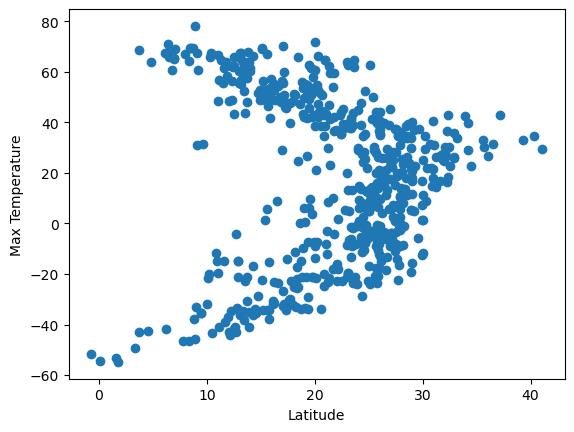

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("Resources/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

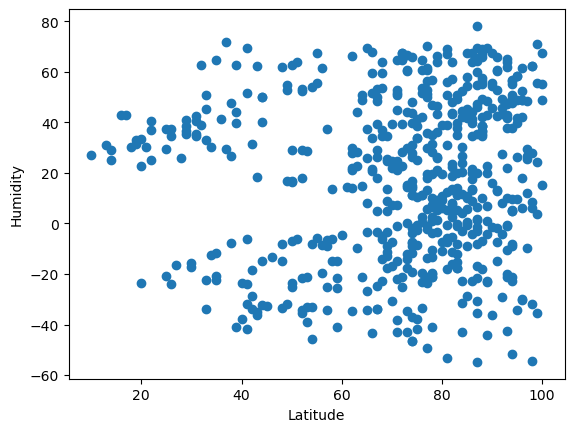

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Save the figure
plt.savefig("Resources/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

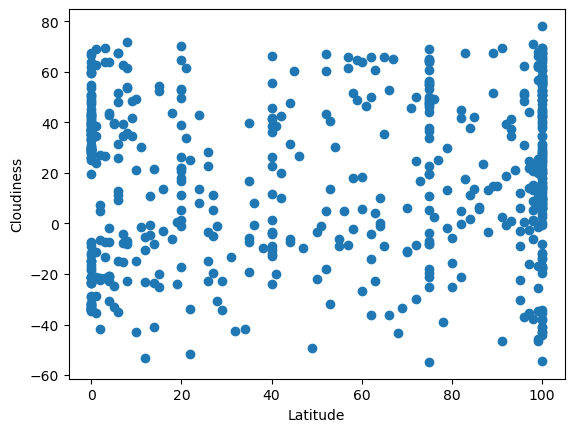

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Save the figure
plt.savefig("Resources/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

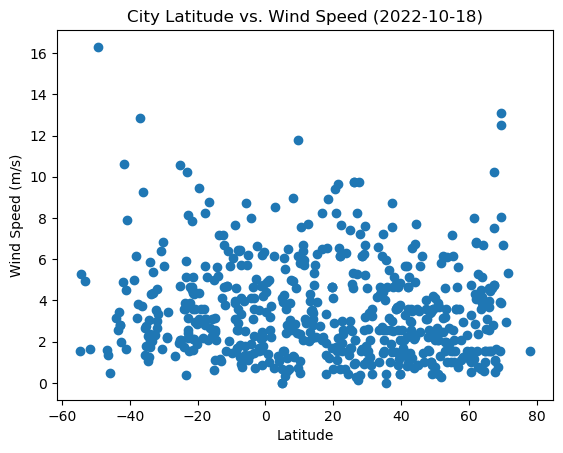

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
# Save the figure
plt.savefig("Resources/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
    
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,fada,9.5667,8.3000,19.55,95,100,0.72,NG,1691718643
3,kudahuvadhoo,2.6708,72.8944,27.93,76,100,6.14,MV,1691718643
6,albany,42.6001,-73.9662,19.82,91,42,1.44,US,1691718633
7,utrik,11.2278,169.8474,28.18,76,6,5.84,MH,1691718118
8,okha,53.5739,142.9478,15.89,76,8,6.09,RU,1691718123


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.33,77,49,16.30,TF,1691718643
2,tual,-5.6667,132.7500,25.64,81,35,8.72,ID,1691718076
4,adamstown,-25.0660,-130.1015,18.45,57,15,10.57,PN,1691718643
5,grytviken,-54.2811,-36.5092,0.14,98,100,5.28,GS,1691718643
13,taltal,-25.4000,-70.4833,18.36,59,99,1.96,CL,1691718644


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6572787347898065


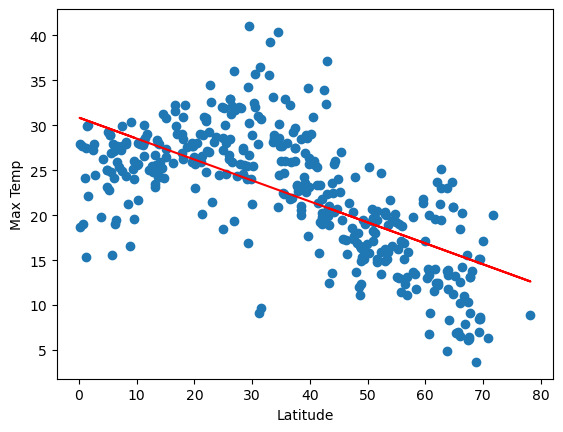

In [18]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.7879723090297281


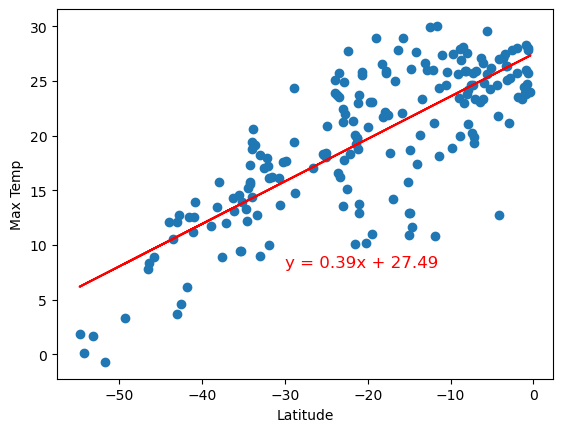

In [19]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30,8))


There is a relatively strong positive correlation between Temperature and Latitude in the southern hemisphere and a relatively strong negative correlation with coefficients of 0.7879723090297281 and -0.6572787347898065.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.029846643453460324


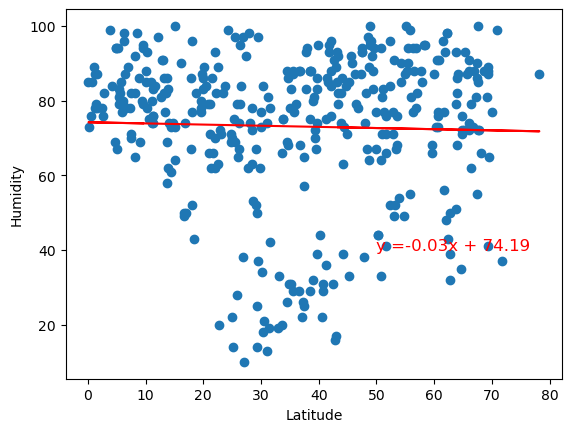

In [20]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

The r-value is: 0.10394756092001818


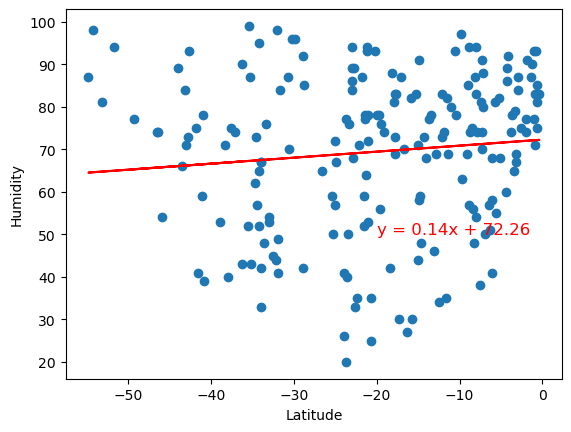

In [21]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

In both the northern and southern hemisphere there is close to no correlation between humidity and latitude with coefficients of 0.10394756092001818 and -0.029846643453460324.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.08354104389050998


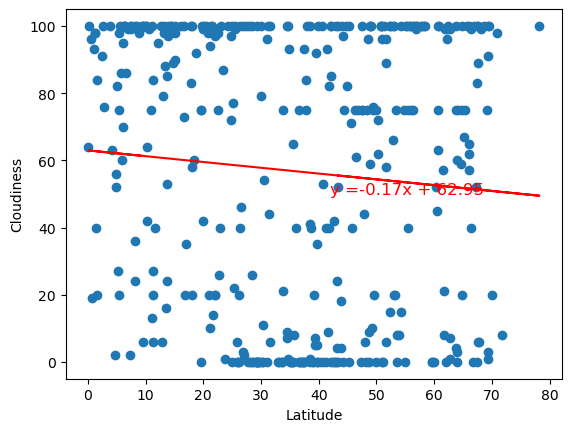

In [22]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: -0.04650170134551636


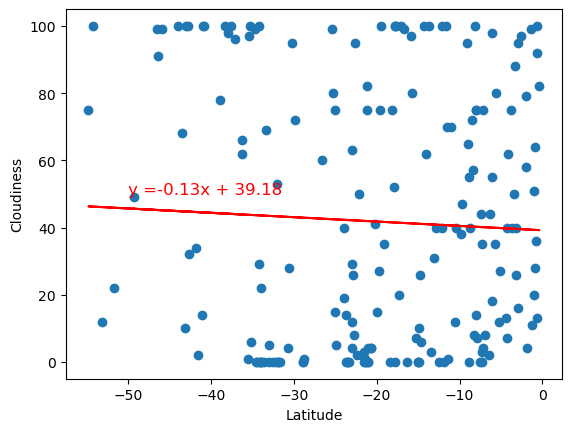

In [23]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

In both the northern and southern hemisphere there is close to no correlation or (a slightly negative) between cloudiness and latitude with coefficients of -0.08354104389050998 and -0.04650170134551636.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.061357362143257606


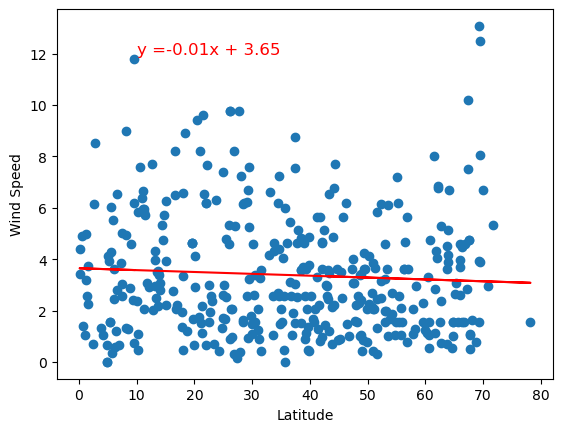

In [24]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.06785697507348658


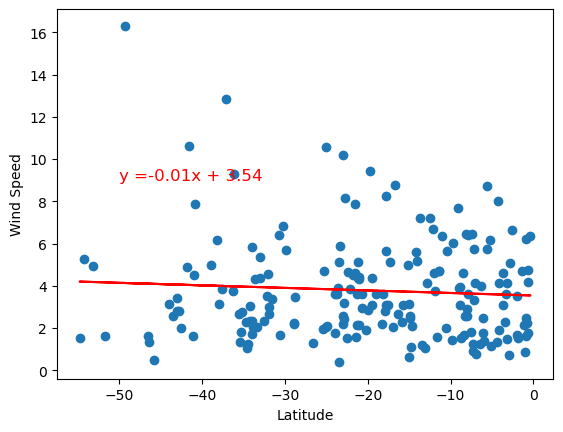

In [25]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

In both the northern and southern hemisphere there is close to no correlation between wind speed and latitude in both hemispheres with coefficients of -0.06785697507348658 and -0.061357362143257606.